## Index
1. [Importing Essential Libraries](#libraries)
2. [Data Summarization](#data_summarization)
3. [Exploratory Data Analysis](#eda)
4. [Data Preparation (New Stuff)](#dataprep) 
5. [Model Evaluation](#modelselect)




<hr>

## Dataset Source

Dataset is obtained from [here](https://www.kaggle.com/datasets/csafrit2/predicting-divorce?resource=download)

<hr>

## Research Problem

**From the dataset, we will evaluate whether a couple will get divorced based on the characteristics of their personalities and relationships using Exploratory Data Analysis and Machine Learning Algorithms.**

<hr>

<a id='libraries'></a>
## 1. Importing Essential Libraries

*Import libraries needed for data preparation, visualisation and modelling*

In [178]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore')
    if not sys.warnoptions:
        warnings.simplefilter("ignore")
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    warnings.filterwarnings('ignore', category=FutureWarning)
suppress_warnings()

*Import libraries needed for Machine Learning*

In [179]:
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble, model_selection, gaussian_process, datasets, preprocessing, discriminant_analysis
from sklearn import svm  #support vector Machine
from xgboost import XGBClassifier #XGBoost
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  #Random Forest, Ensemble VotingClassifier
from sklearn.model_selection import train_test_split  #training and testing data split
from sklearn.model_selection import KFold  #for K-fold cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import metrics  #accuracy measure
from sklearn.metrics import confusion_matrix  #for confusion matrix
suppress_warnings()

*Create helper methods*

In [180]:
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy * 100, 2)
    return train_accuracy

def bold(string):
    display(Markdown(string))


<a id='data_summarization'></a>
## 2. Data Summarization


### 2.1 Statistical Summaries & Visualizations

In [181]:
df = pd.read_csv("divorce.csv")
df.head(5)

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [183]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [184]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

Removed data: **idk_what's_going_on, good_to_leave_home, I'm_not_wrong, Contact(vague), enjoy_travel, roles**

We chose to remove these data values as they are similar to the data values that are already present in the dataframe. For Contact, we removed it as it was unclear what category it can be fitted into.

The remaining data values will be split into 4 broader categories - **Arguments, Behaviour, Quality Time, Ambition**

In [185]:
df_arguments = df[['Aggro_argue','Always_never','negative_personality','offensive_expressions','insult','humiliate','not_calm','hate_subjects'
                   ,'sudden_discussion','calm_breaks','argue_then_leave',"I'm_right",'accusations','no_hesitancy_inadequate','Divorce_Y_N']]

df_arguments.shape

(170, 15)

In [186]:
df_behaviour = df[['Sorry_end','Ignore_diff','begin_correct','likes','care_sick','silent_for_calm','silence_instead_of_discussion','silence_for_harm',
                   'silence_fear_anger','Divorce_Y_N']]

df_behaviour.shape

(170, 10)

In [187]:
df_qualitytime = df[['Special_time','No_home_time','2_strangers','enjoy_holiday','harmony','entertain','Divorce_Y_N']]

df_qualitytime.shape

(170, 7)

In [188]:
df_ambition = df[['common_goals','freeom_value','people_goals','dreams','love','happy','marriage'
                  ,'trust','Divorce_Y_N']]

df_ambition.shape

(170, 9)

### 2.2 Correlation Matrix

Through visualization of the correlation matrix, we can extract variables that are of higher correlation to **Divorce_Y_N** in each of the categories.

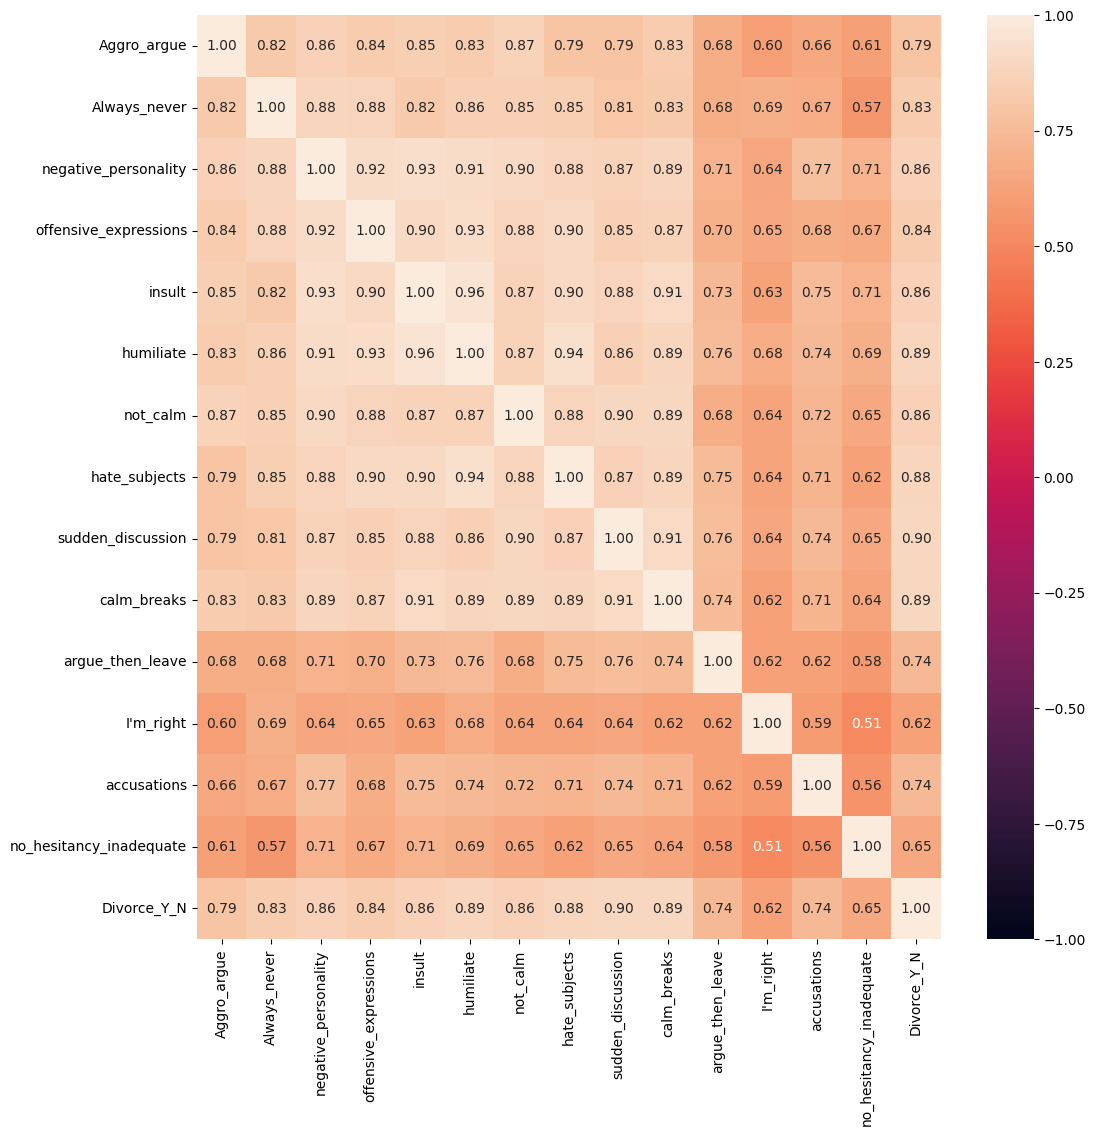

In [189]:
figure = plt.figure(figsize=(12,12))
sns.heatmap(df_arguments.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1)
plt.show()

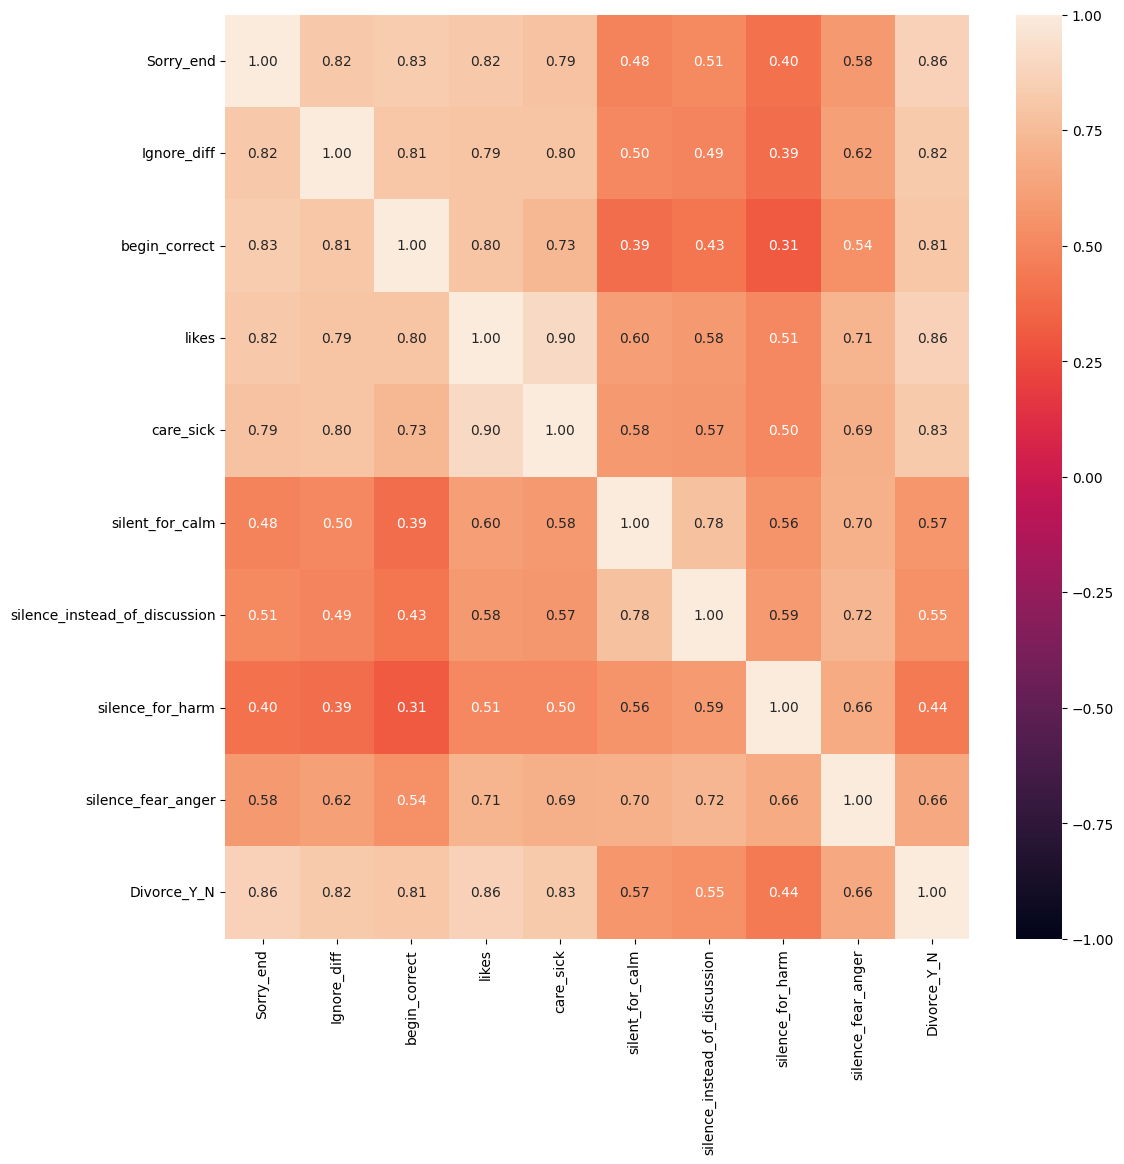

In [190]:
figure = plt.figure(figsize=(12,12))
sns.heatmap(df_behaviour.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1)
plt.show()

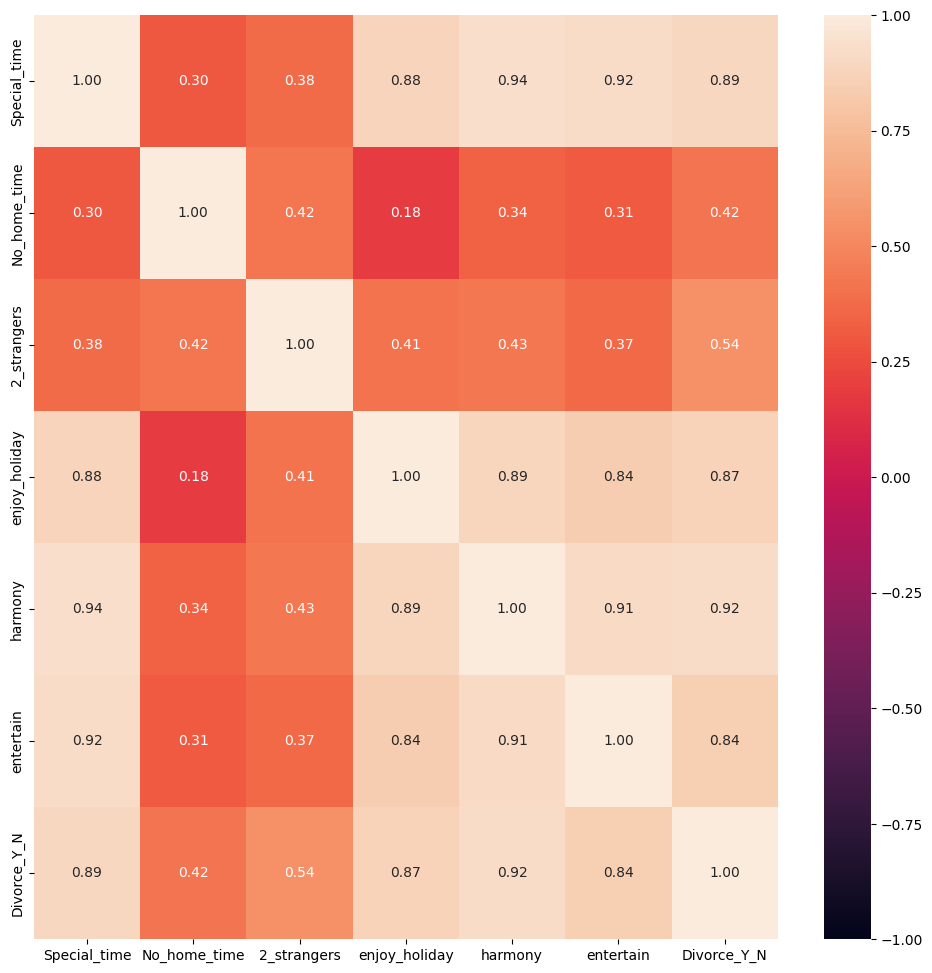

In [191]:
figure = plt.figure(figsize=(12,12))
sns.heatmap(df_qualitytime.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1)
plt.show()

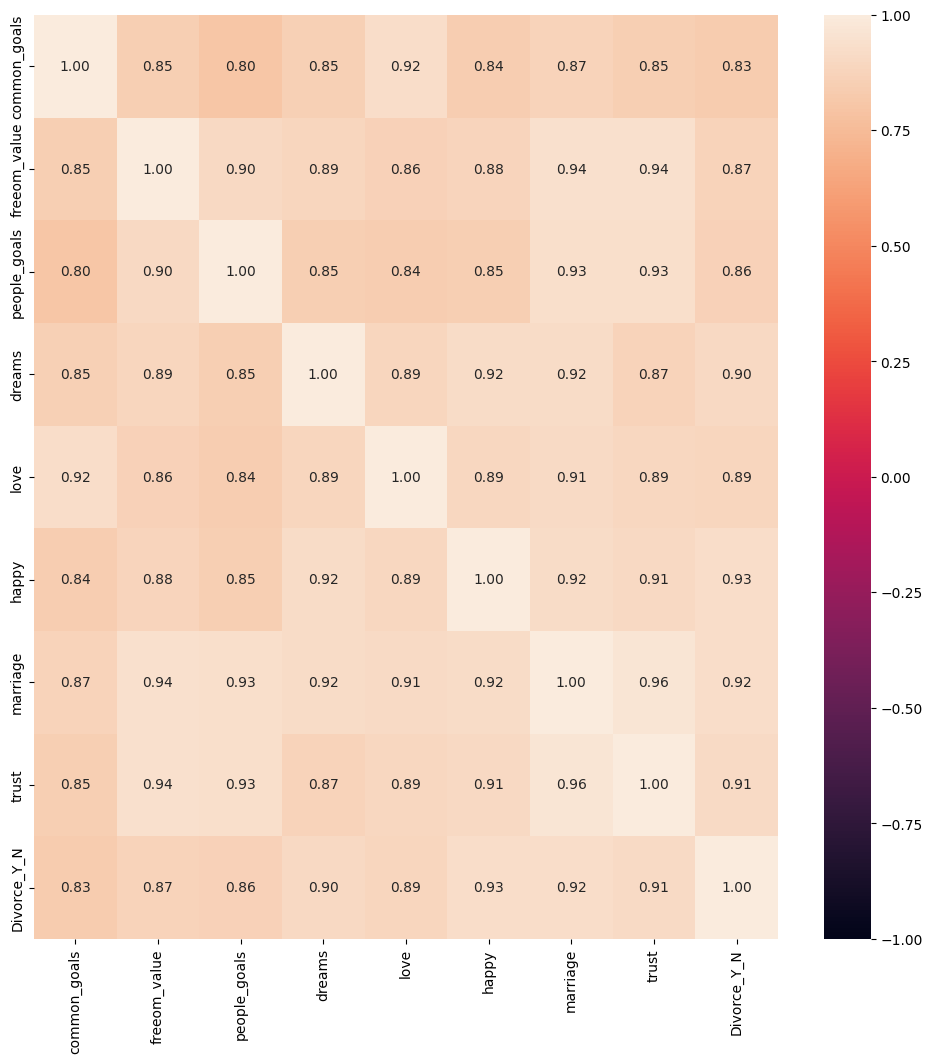

In [192]:
figure = plt.figure(figsize=(12,12))
sns.heatmap(df_ambition.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1)
plt.show()

<a id='eda'></a>
## 3. Exploratory Data Analysis

From the correlation matrixes, we picked out 3 variables from each category that has the strongest linear relationship with Divorce_Y_N with the concept of Factor Analysis in mind.
Since there are no empty or NA values, we can proceed with EDA without the need to clean up the data

**Argument:**
humiliate,
sudden_discussion,
calm_breaks

**Behaviour:**
likes,
Sorry_end,
care_sick

**Quality Time:**
harmony,
Special_time,
enjoy_holiday

**Ambition:**
marriage,
trust,
dreams

In [193]:
# Creating a new dataframe for the variables that has the strongest correlation
df_strongest = df[['humiliate', 'sudden_discussion', 'calm_breaks', 'likes', 'Sorry_end', 'care_sick', 'harmony', 'Special_time', 'enjoy_holiday',
                   'marriage', 'trust', 'dreams', 'Divorce_Y_N']]

print(df_strongest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   humiliate          170 non-null    int64
 1   sudden_discussion  170 non-null    int64
 2   calm_breaks        170 non-null    int64
 3   likes              170 non-null    int64
 4   Sorry_end          170 non-null    int64
 5   care_sick          170 non-null    int64
 6   harmony            170 non-null    int64
 7   Special_time       170 non-null    int64
 8   enjoy_holiday      170 non-null    int64
 9   marriage           170 non-null    int64
 10  trust              170 non-null    int64
 11  dreams             170 non-null    int64
 12  Divorce_Y_N        170 non-null    int64
dtypes: int64(13)
memory usage: 17.4 KB
None


### 3.1 Distribution of Values Within Variables



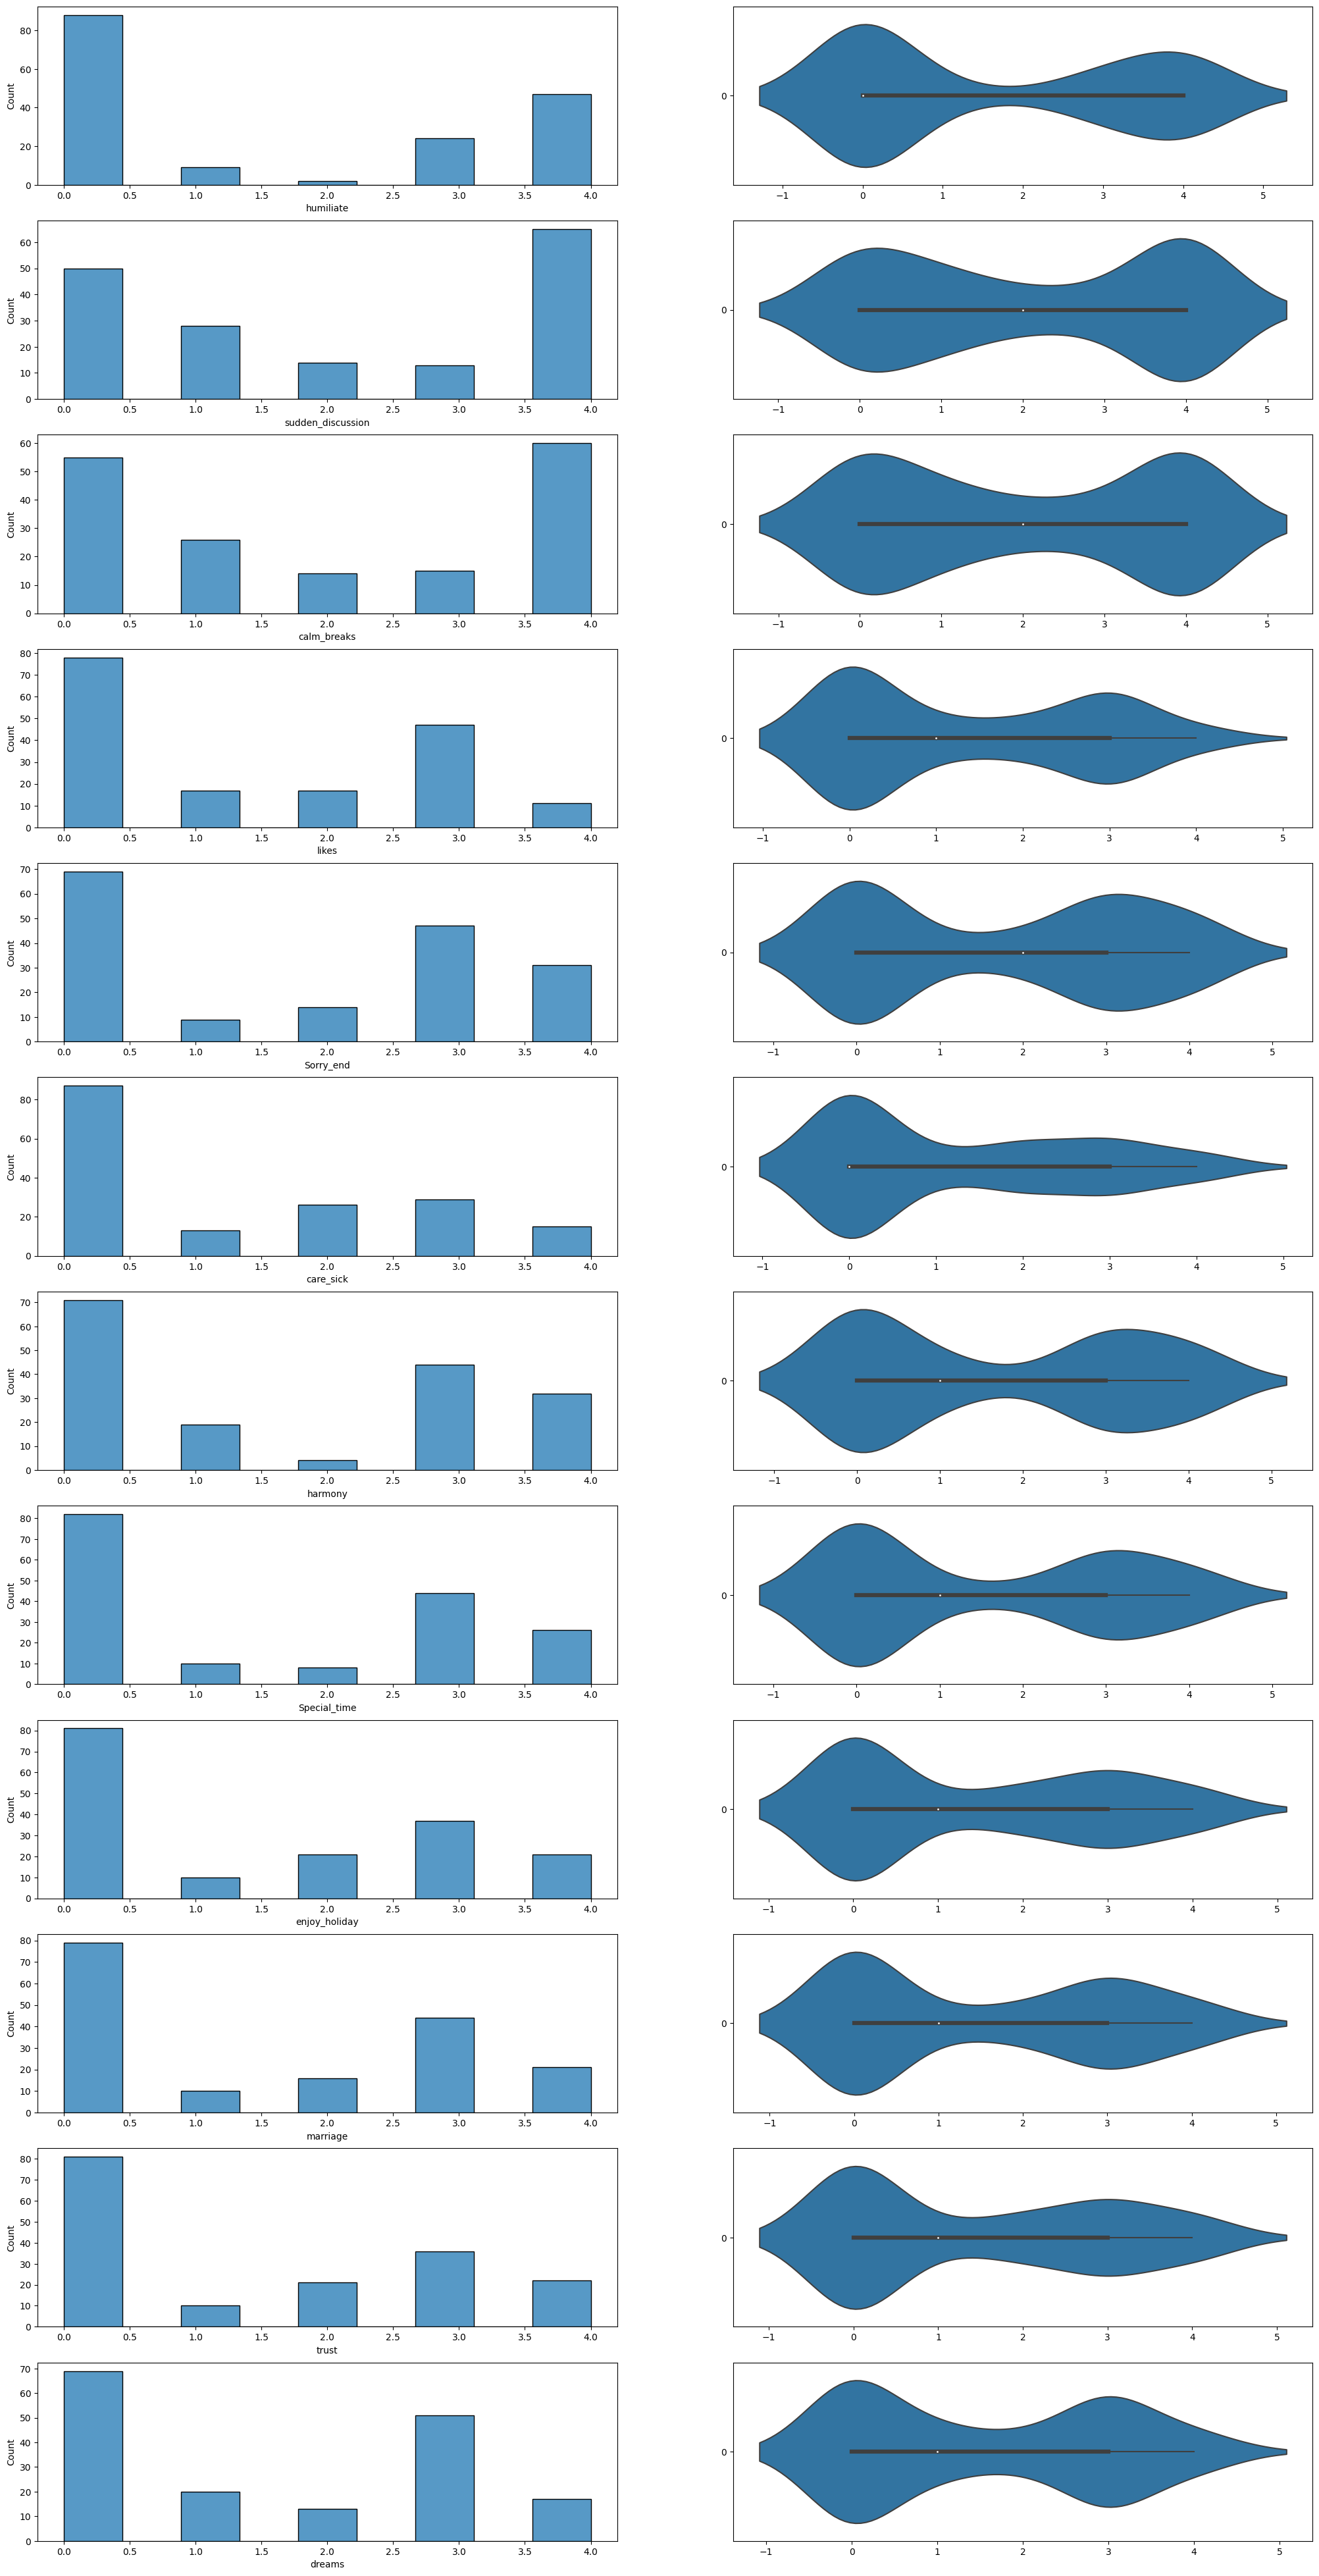

In [194]:
# Drawing the distribution of variables
fig, ax = plt.subplots(12, 2, figsize=(25, 50))

count = 0
for var in df_strongest:
    if(var == 'Divorce_Y_N'):
        break
    sns.histplot(data = df_strongest[var], ax = ax[count, 0])
    sns.violinplot(data = df_strongest[var],  orient = 'h', ax = ax[count, 1])
    count += 1

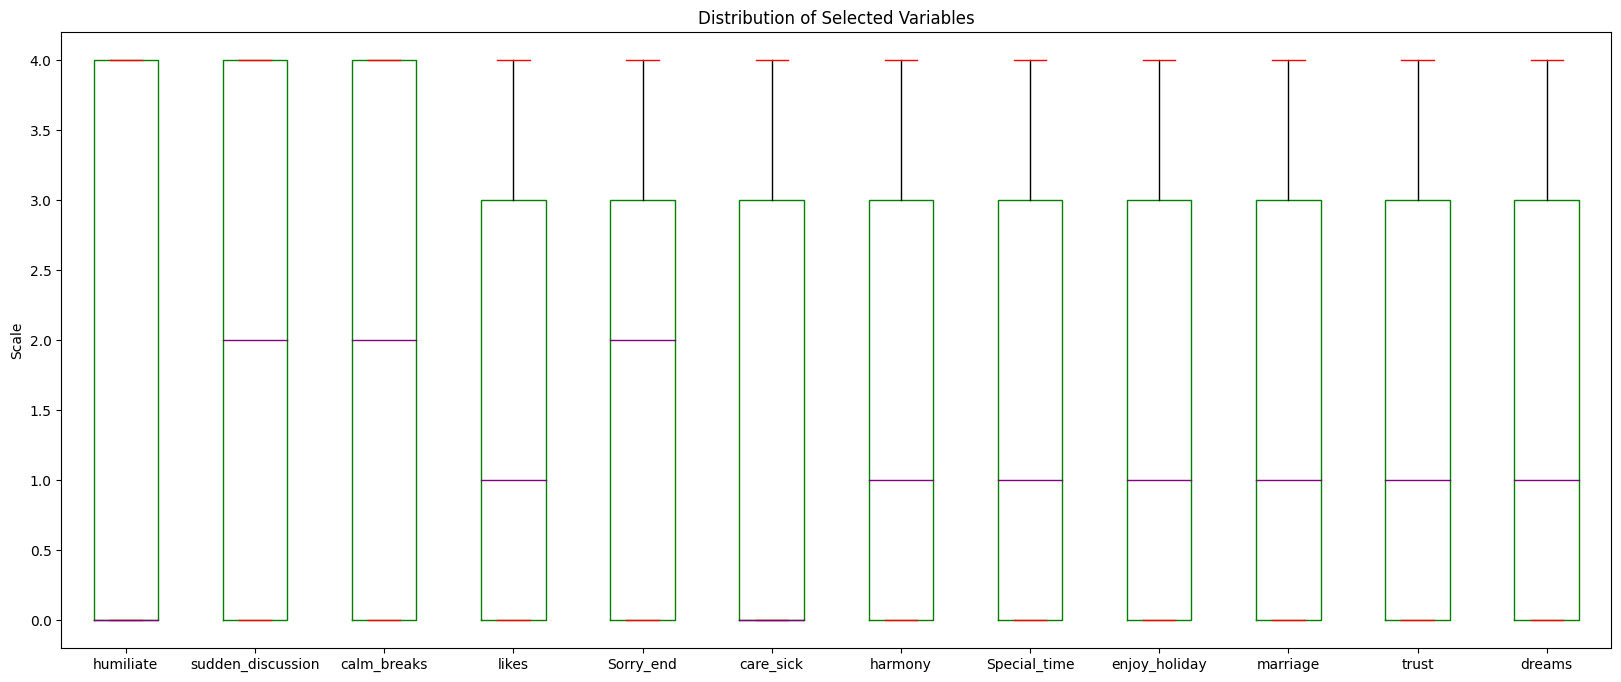

In [195]:
fig= plt.figure(figsize=(20, 8))
plt.boxplot(df_strongest.drop('Divorce_Y_N', axis=1), labels=list(df_strongest.drop('Divorce_Y_N', axis=1)), boxprops=dict(color='green')
            , capprops=dict(color='red'), medianprops=dict(color='purple'))
plt.title('Distribution of Selected Variables')
plt.ylabel('Scale')
fig.show()

### 3.2 Distribution of Variables Based on Divorce_Y_N

<Figure size 2000x1200 with 0 Axes>

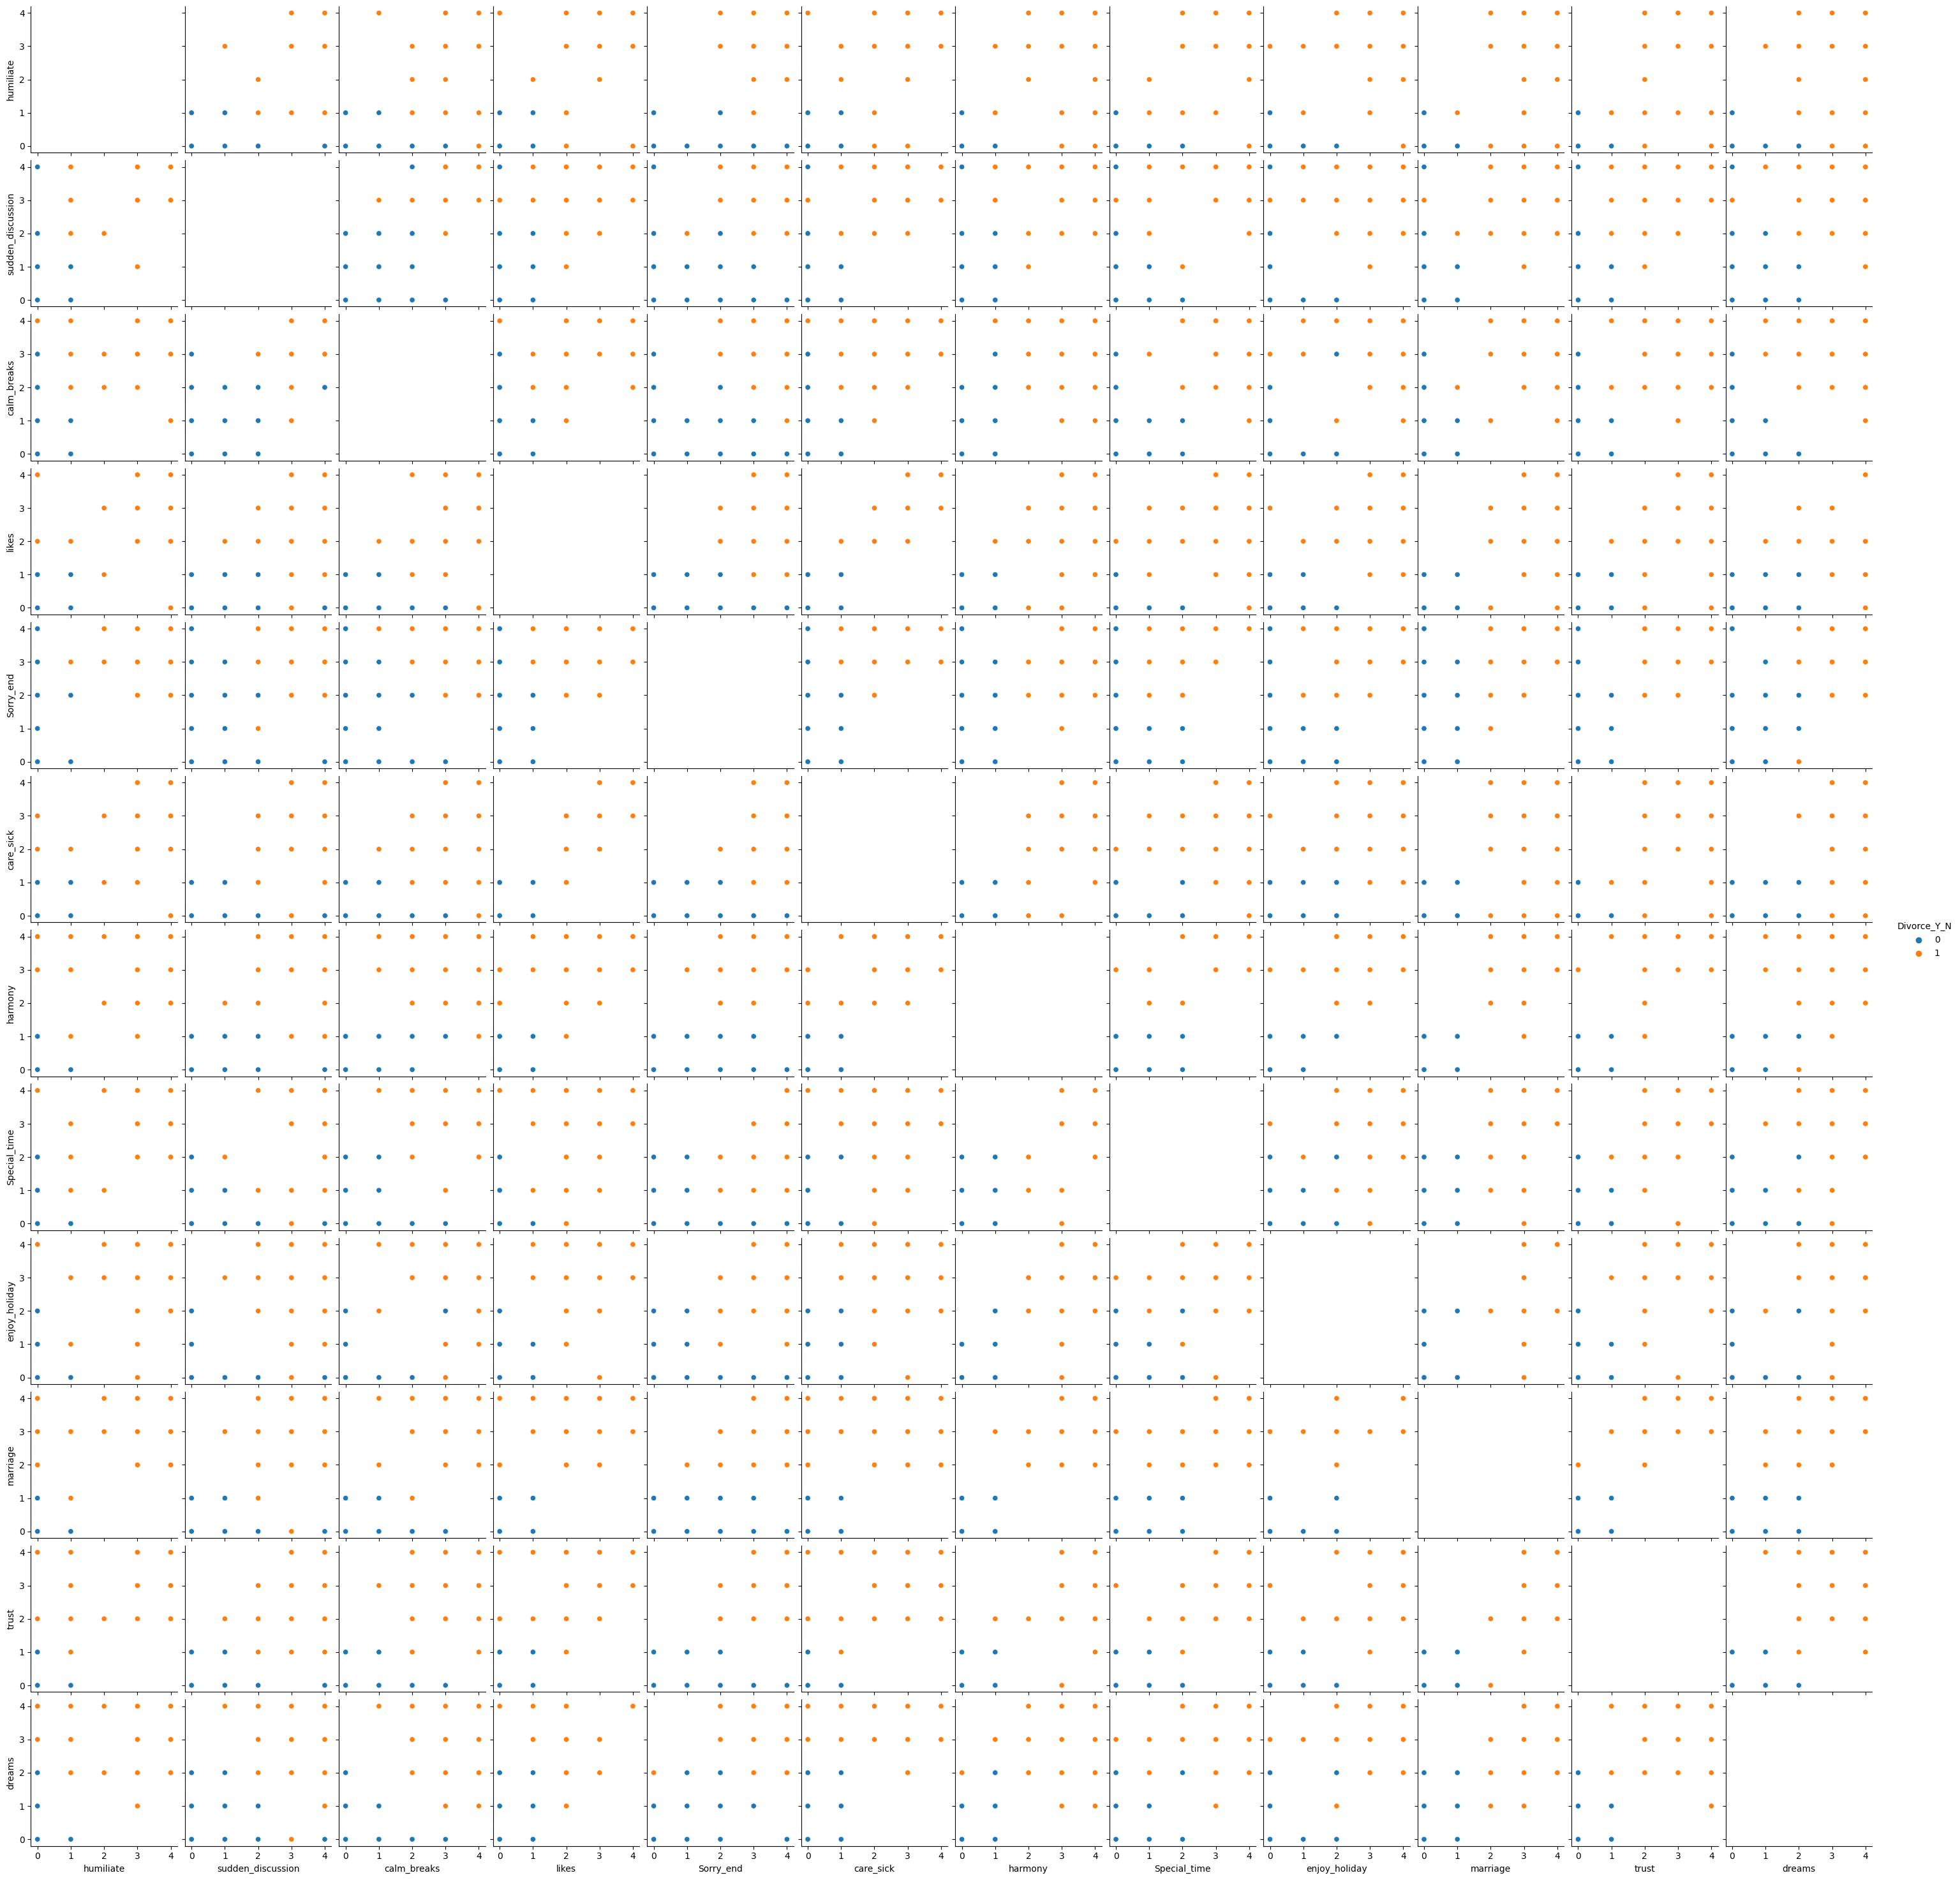

In [196]:
fig = plt.figure(figsize=(20,12))
sns.pairplot(data = df_strongest, hue = 'Divorce_Y_N', diag_kind= 'scatter')
fig.show()

### Insights

- From the histogram, violinplots, and boxplots, we can infer that the data is well-distributed and therefore suitable to be picked as predictors for divorce.

- From the pairplot, based on how evenly distributed **Divorce_Y_N** is for each of the selected predictors based on their values, it can once again be inferred that they are suitable predictors.

<a id='dataprep'></a>
## 4. Data Preparation (New Stuff)

### 4.1 Model Training

We randomly split the dataset into training and test sets in a 80:20 ratio, we will compare the different categories with the models and find out which category is the best in predicting **Divorce_Y_N**

**New Stuff:**
- Bagging Classfier
- Extra Trees Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- Gaussian Process Classifier
- Logistic Regression CV
- Gaussian Naive Bayes
- K Neighbors Classifier
- SVC
- Linear SVC
- Linear Discriminant Analysis
- XGB Classifier

In [197]:
# Initialise models
models = [
    #-------Ensemble Methods---------(Combine multiple weak models to
    #form strong model/learner)
    #-------Bagging----
    ensemble.BaggingClassifier(),  #Bootstrap Aggregating
    #First, we create random samples of the training data set
    #(sub sets of training data set). Then, we build a classifier for each
    #sample. Finally, results of these multiple classifiers are combined
    #using average or majority voting.
    #Bagging helps to reduce the variance error.
    
    #-------Random Forest----
    ensemble.RandomForestClassifier(n_estimators=50),
    ensemble.ExtraTreesClassifier(),  #variant of a random forest 
    #Unlike a random forest, at each step the entire sample is used and
    #decision boundaries are picked at random, rather than the best one.
    
    #-------Boosting----
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    #Boosting has shown better predictive accuracy than bagging,
    #but it also tends to over-fit the training data as well.

    #Gaussian Processes--------
    gaussian_process.GaussianProcessClassifier(),

    #GLM--------
    linear_model.LogisticRegressionCV(),

    #Naive Bayes-----
    naive_bayes.GaussianNB(),

    #K Nearest Neighbor-----
    neighbors.KNeighborsClassifier(),

    #SVM--------
    svm.SVC(probability=True),
    svm.LinearSVC(),

    #Trees-------
    tree.DecisionTreeClassifier(),

    #Discriminant Analysis-----
    discriminant_analysis.LinearDiscriminantAnalysis(),
    #     makes predictions by estimating the probability that a new set of
    #     inputs belongs to each class. The class that gets the highest probability
    #     is the output class and a prediction is made

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
]

In [198]:
# Argument
y = df_strongest[['Divorce_Y_N']]
X = df_strongest[['humiliate','sudden_discussion', 'calm_breaks']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Train set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Train set:  (136, 3) (136, 1)
Testing set:  (34, 3) (34, 1)


In [199]:
model_accuracies, model_names = [], []
for model in models:
    model_accuracies.append(train_accuracy(model))
    model_names.append(model.__class__.__name__)

training_accuracy = pd.DataFrame({'Train_accuracy(%)': model_accuracies})
training_accuracy.index = model_names
sorted_train_accuracy = training_accuracy.sort_values(
    by='Train_accuracy(%)', ascending=False)
bold('**Training Accuracy of the Classifiers for Argument:**')
display(sorted_train_accuracy)


**Training Accuracy of the Classifiers for Argument:**

,Train_accuracy(%)
BaggingClassifier,98.53
RandomForestClassifier,98.53
ExtraTreesClassifier,98.53
GradientBoostingClassifier,98.53
DecisionTreeClassifier,98.53
XGBClassifier,98.53
AdaBoostClassifier,97.79
GaussianProcessClassifier,97.79
LogisticRegressionCV,97.79
GaussianNB,97.79


In [200]:
# Behaviour
y = df_strongest[['Divorce_Y_N']]
X = df_strongest[['likes', 'Sorry_end', 'care_sick']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Train set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Train set:  (136, 3) (136, 1)
Testing set:  (34, 3) (34, 1)


In [201]:
model_accuracies, model_names = [], []
for model in models:
    model_accuracies.append(train_accuracy(model))
    model_names.append(model.__class__.__name__)

training_accuracy = pd.DataFrame({'Train_accuracy(%)': model_accuracies})
training_accuracy.index = model_names
sorted_train_accuracy = training_accuracy.sort_values(
    by='Train_accuracy(%)', ascending=False)
bold('**Training Accuracy of the Classifiers for Behavior:**')
display(sorted_train_accuracy)


**Training Accuracy of the Classifiers for Behavior:**

,Train_accuracy(%)
BaggingClassifier,95.59
RandomForestClassifier,95.59
ExtraTreesClassifier,95.59
AdaBoostClassifier,95.59
GradientBoostingClassifier,95.59
GaussianProcessClassifier,95.59
KNeighborsClassifier,95.59
DecisionTreeClassifier,95.59
XGBClassifier,95.59
SVC,94.85


In [202]:
# Quality Time
y = df_strongest[['Divorce_Y_N']]
X = df_strongest[['harmony', 'Special_time', 'enjoy_holiday']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Train set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Train set:  (136, 3) (136, 1)
Testing set:  (34, 3) (34, 1)


In [203]:
model_accuracies, model_names = [], []
for model in models:
    model_accuracies.append(train_accuracy(model))
    model_names.append(model.__class__.__name__)

training_accuracy = pd.DataFrame({'Train_accuracy(%)': model_accuracies})
training_accuracy.index = model_names
sorted_train_accuracy = training_accuracy.sort_values(
    by='Train_accuracy(%)', ascending=False)
bold('**Training Accuracy of the Classifiers for Quality Time:**')
display(sorted_train_accuracy)


**Training Accuracy of the Classifiers for Quality Time:**

,Train_accuracy(%)
BaggingClassifier,97.79
RandomForestClassifier,97.79
ExtraTreesClassifier,97.79
AdaBoostClassifier,97.79
GradientBoostingClassifier,97.79
DecisionTreeClassifier,97.79
GaussianProcessClassifier,97.06
GaussianNB,97.06
LinearSVC,97.06
LinearDiscriminantAnalysis,97.06


In [204]:
# Ambition
y = df_strongest[['Divorce_Y_N']]
X = df_strongest[['marriage', 'trust', 'dreams']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Train set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Train set:  (136, 3) (136, 1)
Testing set:  (34, 3) (34, 1)


In [205]:
model_accuracies, model_names = [], []
for model in models:
    model_accuracies.append(train_accuracy(model))
    model_names.append(model.__class__.__name__)

training_accuracy = pd.DataFrame({'Train_accuracy(%)': model_accuracies})
training_accuracy.index = model_names
sorted_train_accuracy = training_accuracy.sort_values(
    by='Train_accuracy(%)', ascending=False)
bold('**Training Accuracy of the Classifiers for Ambition:**')
display(sorted_train_accuracy)


**Training Accuracy of the Classifiers for Ambition:**

,Train_accuracy(%)
BaggingClassifier,99.26
RandomForestClassifier,99.26
ExtraTreesClassifier,99.26
AdaBoostClassifier,99.26
GradientBoostingClassifier,99.26
GaussianProcessClassifier,99.26
LogisticRegressionCV,99.26
KNeighborsClassifier,99.26
SVC,99.26
LinearSVC,99.26


### Insights

- Based on the train datasets, we chose the category of **Ambition** which has the highest recorded accuracy.

- For all of the categories ExtraTrees, RandomForest, and AdaBoost classifiers tend to produce the highest prediction accuracy which is why we chose them as the best-fitting models for further evaluation.

<a id='modelselect'></a>
## 5. Model Evaluation

Picking out 3 models with highest training accuracy, RandomForestClassifier, ExtraTreesClassifier, and AdaBoostClassifier, we will evaluate each model using Cross-Validation and Confusion Matrix

### 5.1 Cross-Validation

In [206]:
bestModels = [
    ensemble.RandomForestClassifier(n_estimators=50),
    ensemble.ExtraTreesClassifier(),
    ensemble.AdaBoostClassifier()
]

y = df_strongest[['Divorce_Y_N']]
X = df_strongest[['marriage', 'trust', 'dreams']]

kfold = StratifiedKFold(n_splits=10)
name = []
mean = []
accuracy = []
time = []
std = []
for model in bestModels:
    cv_result = model_selection.cross_val_score(
        model, X, y, cv=kfold, scoring="accuracy")
    MLA_name = model.__class__.__name__
    cv_result = cv_result
    name.append(MLA_name)
    MLA_mean = np.round(cv_result.mean() * 100, 2)
    mean.append(MLA_mean)
    std.append(np.round(cv_result.std() * 100, 2))
    accuracy.append(cv_result)
bold('**CV Mean Accuracy of the Classifiers:**')
MLA_compare = pd.DataFrame({
    'Name': name,
    'CV_Mean_Accuracy(%)': mean,
    'Std': std
})

MLA_compare.sort_values(
    by=['CV_Mean_Accuracy(%)'], ascending=False, inplace=True)
MLA_compare

**CV Mean Accuracy of the Classifiers:**

,Name,CV_Mean_Accuracy(%),Std
1,ExtraTreesClassifier,96.47,6.00
0,RandomForestClassifier,95.88,5.91
2,AdaBoostClassifier,95.88,6.47


### 5.2 Confusion Matrix

- A **Confusion Matrix** is used to observe and analyse the _false positive_ and _false negative_ predictions because even though some models have good accuracy scores, they might have high _false negative_ rate and a low _false positive_ rate or vice versa which shows that the model is _biased_.

- A **F1 score** is used to evaluate model performance in case number of false positives and false negatives predicted is quite different (uneven class distribution).

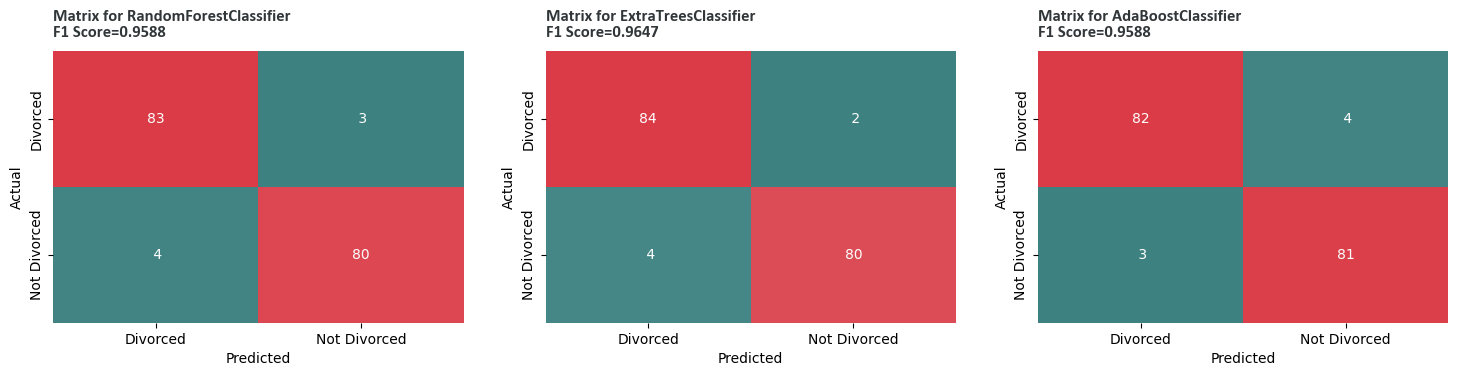

In [207]:
cmap = sns.diverging_palette(190, 10, as_cmap=True)
titleFont = {
    'loc': 'left',
    'pad': 10,
    'fontname': 'Calibri',
    'fontweight': 'bold',
    'color': '#313639'
}
fig, ax = plt.subplots(3, 3, figsize=(18,12))
i = 1
j = 0
for i in range(1, 3):
    for j in range(0, 3):
        fig.delaxes(ax[i][j])

ycount = 0
for model in bestModels:
    labels = ['Divorced', 'Not Divorced']
    y_pred = model_selection.cross_val_predict(model, X, y, cv=10)
    sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt='2.0f',ax=ax[0, ycount],cmap=cmap, cbar=False)
    ax[0, ycount].set_title('Matrix for ' + model.__class__.__name__ + '\nF1 Score={:0.4f}'.format(
            metrics.f1_score(y, y_pred, average='weighted')), **titleFont)
    ax[0, ycount].xaxis.set_ticklabels(labels)
    ax[0, ycount].yaxis.set_ticklabels(labels)
    ax[0, ycount].set_ylabel('Actual')
    ax[0, ycount].set_xlabel('Predicted')
    ycount += 1

### Insights

- ExtraTreesClassifier has the highest F1 score

- ExtraTreesClassifier has the least amount of _false positive_ and the highest amount of _true positives_

### Recommendations

- Prediction accuracy of the models might be able to improve through hyperparameters tuning such as changing the **base_estimator** parameter of BaggingClassfier model to LogisticRegression or LinearSVC

- Feature engineering could be done to combine 1 or more variables into a single predictor which might increase accuracy

- Overfitting should also be prevented by ensuring the number of variables is optimal so that the model can learn the underlying patterns for prediction instead of learning the noise in training data which might lead to poorer performance.